Passos:
1. Criar um agente [AGENTE1] para analisar o tipo da informação:
  Tipos:
  0. URL
  1. Email;
  2. SMS;
  Para este exercício vamos utilizar apenas a opção 0.

2. Após análise da informação e detectar que é uma informação maliciosa, deve ser chamado um outro agente [AGENTE2] para analisar em quais artigos da lei pode ser enquadrada esta tentativa de fraude. Para tal, deve ser enviada uma Instância da classe WebsitePhishing para a Ontologia de Delitos Informáticos e essa deve retornar, após racioncinar, um texto informando os artigos (classes associadas) da lei.

A título didático e de exemplo, os dois agentes agem dentro do disposito mobile, representado pela imagem do celular na figura abaixo.

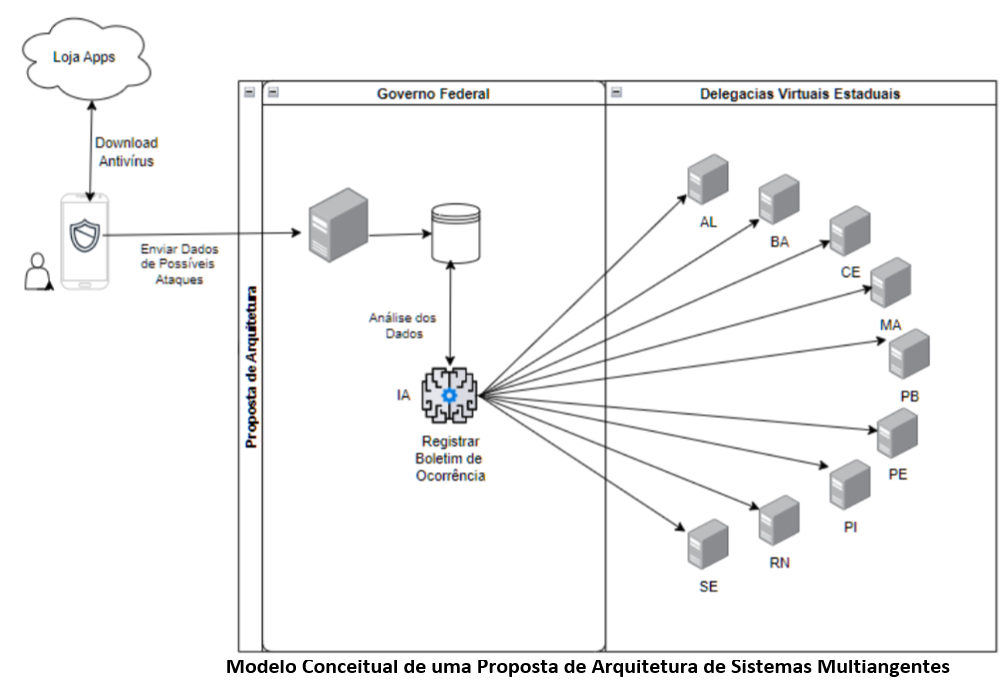

Faça o upload do arquivo OWL ou RDF:


Saving DrOntoDelitosInformaticos to DrOntoDelitosInformaticos (1)
Ontologia carregada: get_ontology("http://www.delitosinformaticos.org/ontologia#")

Classes na ontologia:
 - FraudeEletronica
 - Código_Penal
 - InvasaoPrivacidade
 - CyberStalking
 - Spyware
 - DelitoInformatico
 - Impuro
 - Puro
 - Humana
 - TecnicaAtaqueEngenhosidadeSocial
 - Phishing
 - SpearPhishing
 - Polícia_Civil
 - Polícia_Federal
 - Tribunais_Estaduais
 - Tribunais_Regionais_Federais
 - Art171§2A
 - EvilTwin
 - Man-in-the-Middle
 - Pharming
 - SearchEnginePhishing
 - Smishing
 - Tabnabbing
 - Vishing
 - Whaling
 - Error1
 - Adware
 - TecnicaAtaqueSoftwareMalicioso
 - AgenteAtaque
 - AgenteMalicioso
 - AgentePhishing
 - AutenticacaoMultifator
 - MedidaDefesa
 - Backdoors
 - Baiting
 - Botnet
 - Broken_Authentication
 - TecnicaAtaqueAplicacaoWeb
 - Comunicacao
 - Configuração_Inadequada
 - TecnicaAtaqueRede
 - Conscientizacao
 - PrevencaoProtecao
 - ConsequenciaAtaque
 - Cross_Site_Request_Forgery_CSRF
 - Cross_S

A saída de streaming foi truncada nas últimas 5000 linhas.
* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring cyclic type of, involving storid 501

* Owlready2 * Warning: ignoring

In [ ]:
!pip install owlready2
!pip install rdflib==5.0.0 # Install a compatible rdflib version

# Importar a biblioteca
from owlready2 import *
from google.colab import files
from rdflib import Graph  # Import rdflib's Graph
import io  # For in-memory file handling
import os


##### INICIO AGENTE_1 - VALIDAR TIPOS DE ATAQUES ##########################

# Verificar tipo de ataque e processar
TIPOS_ATAQUE = ["EmailPhishing", "Smishing", "Vishing", "WebsitePhishing"]
def validar_tipo_ataque(tipo):
    if tipo not in TIPOS_ATAQUE:
        raise ValueError(f"Tipo de ataque '{tipo}' não reconhecido. Escolha entre: {', '.join(TIPOS_ATAQUE)}")

# Neste momento o agente indica que o ataque é de WebsitePhishing
tipo_ataque = "WebsitePhishing"

# Aqui é realizado uma validação para saber se o tipo de ataque informado,
# encontra-se na lista do tipo de ataque que deve ser validado.
validar_tipo_ataque(tipo_ataque)

# Informa na tela qual o tipo de ataque foi selecionado
print(f"Tipo de ataque selecionado: {tipo_ataque}")

########################## FIM AGENTE1 #####################################


##### INICIO AGENTE_2 - CARREGAR ONTOLOGIA, CRIAR INSTANCIA, RACIOCINAR E
#RETORNAR COM OS ARTIGOS QUE ENQUADRAM O CRIME


# Carregando a Ontologia
def carregar_ontologia():
    print("Faça o upload do arquivo OWL ou RDF:")
    uploaded = files.upload()
    for filename in uploaded.keys():
        ontology_path = filename
    onto = get_ontology(f"file://{ontology_path}").load()
    print(f"Ontologia carregada: {onto}")
    return onto

# Carregar a ontologia
ontologia = carregar_ontologia()

# Levanta uma exceção caso ocorra algum erro ao carregar a exceção
if not ontologia:
    raise ValueError("A ontologia não foi carregada corretamente.")

# Explorar a ontologia
def explorar_ontologia(ontologia):
    print("\nClasses na ontologia:")
    for cls in ontologia.classes():
        print(f" - {cls.name}")

    print("\nRelações de objetos na ontologia:")
    for prop in ontologia.object_properties():
        print(f" - {prop.name} (domínio: {prop.domain}, alcance: {prop.range})")

    print("\nPropriedades de dados na ontologia:")
    for prop in ontologia.data_properties():
        print(f" - {prop.name} (domínio: {prop.domain}, tipo: {prop.range})")

    print("\nInstâncias na ontologia:")
    for ind in ontologia.individuals():
        print(f" - {ind.name} ({type(ind)})")

# Consultar classes e propriedades
explorar_ontologia(ontologia)

# Criar e salvar instâncias para o tipo de ataque selecionado
from owlready2 import sync_reasoner_pellet, get_ontology


# Criar e salvar instâncias para o tipo de ataque selecionado
def criar_instancia_e_raciocinar(ontologia, tipo_ataque):
    # Validar a ontologia
    if ontologia is None:
        raise ValueError("A ontologia não foi carregada corretamente.")
    cls = ontologia[tipo_ataque]
    if cls:
      print("\nEntrou no if do CLS")
      # Criar instância do tipo de ataque
      instance_name = f"{tipo_ataque.lower()}_instance"
      if isinstance(cls, ThingClass):
        instance = cls(instance_name, world=ontologia.world)
        # Verificar as instâncias da classe
        print(f"Instâncias da classe '{tipo_ataque}':")
        for inst in cls.instances():
          print(inst.name)
        # Iniciar raciocínio
        print("\nIniciando raciocínio com Pellet...")
        with ontologia:
            sync_reasoner_pellet(infer_property_values=True, infer_data_property_values=True)
        print("Raciocínio concluído.")
        # Consultar artigos relacionados ao ataque
        query = f"""
          PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
          PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
          PREFIX ex: <http://www.delitosinformaticos.org/ontologia#>

          SELECT DISTINCT ?associatedClass
          WHERE {{
              ex:{instance_name} ex:éTipificadoPor ?associatedEntity.
              ?associatedEntity rdf:type ?associatedClass.
          }}
          """
        resultados = consulta_sparql(query)
        # Exibir os resultados da consulta
        print("\nResultados da consulta SPARQL:")
        for resultado in resultados:
            print(f" - {resultado}")
      else:
          print(f"Error: '{tipo_ataque}' is not a ThingClass. It is of type {type(cls)}")
          #print(f"Classe '{tipo_ataque}' não encontrada na ontologia.")
    else:
      print(f"Classe '{tipo_ataque}' não encontrada na ontologia.")

# Consultas SPARQL

def consulta_sparql(query):
    print(f"\nExecutando consulta SPARQL:\n{query}")
    try:
        results = list(default_world.sparql(query))
        print("\nResultados da consulta:")
        if results:
            for result in results:
                print(result)
        else:
            print("Nenhum resultado encontrado.")
    except Exception as e:
        print(f"Erro na consulta SPARQL: {e}")

# Processar o tipo de ataque selecionado
criar_instancia_e_raciocinar(ontologia, tipo_ataque)


def salvar_ontologia(ontologia, filename):
    try:
      ontologia.save(file=filename, format="rdfxml")
      print(f"Ontologia salva como {filename}.")
    except TypeError as e:
      print(f"Erro ao salvar a ontologia: {e}", file=sys.stderr)  # Print the specific error to stderr
      print("Verifique a estrutura da sua ontologia para possíveis problemas com listas RDF.", file=sys.stderr)

salvar_ontologia(ontologia,"ontologia_atualizada_V2.rdf" )

######## FIM AGENTE 2


